<b>1.</b>Function that takes an input image, performs convolution with a given kernel, and returns the
resulting image.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def check(image, kernel):
    k = kernel.shape
    rows, columns = image.shape
    kernel_is_correct = k[0] % 2 == 1 and k[1] % 2 == 1
    assert kernel_is_correct, 'Kernel shape should be odd.'
    matrix_to_kernel_is_correct = rows >= k[0] and columns >= k[1]
    assert matrix_to_kernel_is_correct, 'Kernel can\'t be bigger than matrix in terms of shape.'

In [3]:
def convert_yuv(image):
    rgb_weights_ = [0.2126, 0.5870, 0.1140]
    image = np.array(Image.open(image))
    luma = image[...,:3] @ rgb_weights_
    return luma

In [4]:
def convolve2d(image, kernel, normalize=False):
    if normalize:
        kernel = kernel/np.sum(kernel)
    
    check(image, kernel)
    kernel = np.flipud(np.fliplr(kernel))#Flipping image because its convolution not correlation.
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))#padding image
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

<b>2</b>.Design a convolution kernel that computes, for each pixel, the average intensity value in a 3x3 region.
Use this kernel and the filtering function above, and save the resulting image.

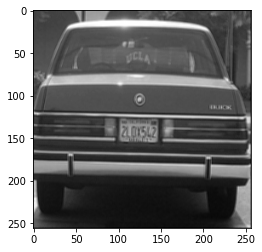

In [5]:
KERNEL = np.array([[1, 1, 1], [1, 1, 2], [1, 1, 1]])
image = convert_yuv("dataset/DatasetA/car-1.jpg")
image = convolve2d(image, KERNEL, normalize=True)
plt.imshow(image, cmap="gray")

<b>3.</b>Use the kernels provided below, apply the filtering function and save the resulting images. Comment
on the effect of each kernel.

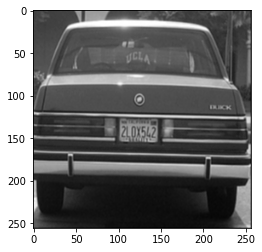

In [6]:
KERNEL = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
image = convert_yuv("dataset/DatasetA/car-1.jpg")
image = convolve2d(image, KERNEL, normalize=True)
plt.imshow(image, cmap="gray")

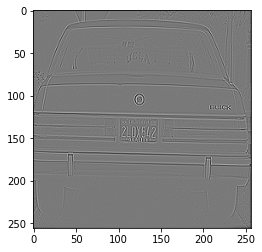

In [7]:
KERNEL = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
image = convert_yuv("dataset/DatasetA/car-1.jpg")
image = convolve2d(image, KERNEL, normalize=False)
plt.imshow(image, cmap="gray")

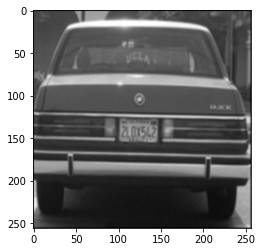

In [8]:
KERNEL1 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
KERNEL2 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
image = convert_yuv("dataset/DatasetA/car-1.jpg")
image = convolve2d(image, KERNEL1, normalize=True)
plt.imshow(image, cmap="gray")
image = convolve2d(image, KERNEL2, normalize=True)
plt.imshow(image, cmap="gray")

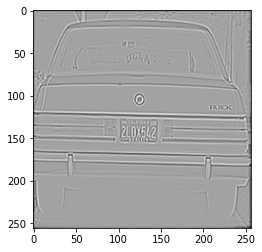

In [9]:
KERNEL1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
KERNEL2 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
image = convert_yuv("dataset/DatasetA/car-1.jpg")
image = convolve2d(image, KERNEL1)
plt.imshow(image, cmap="gray")
image = convolve2d(image, KERNEL2, normalize=True)
plt.imshow(image, cmap="gray")

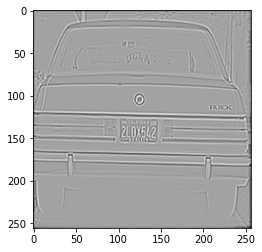

In [10]:
KERNEL1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
KERNEL2 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
image = convert_yuv("dataset/DatasetA/car-1.jpg")
image = convolve2d(image, KERNEL2, normalize=True)
plt.imshow(image, cmap="gray")
image = convolve2d(image, KERNEL1)
plt.imshow(image, cmap="gray")